<a href="https://colab.research.google.com/github/ehestir/Du-Bois-STEM/blob/main/ErinsChoroplethNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing necessary libaries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

import zipfile
import requests
import io

## Understanding Choropleth Maps: A Foundation in Spatial Thinking

Choropleth maps are one of the most common ways to visualize geographic data. At their core, they show how much of something—like population density or median income—varies across different geographic areas, such as counties, states, or census tracts. They do this by shading each area in a color that reflects the relative value of the variable being mapped. Darker or more intense colors usually represent higher values, while lighter colors represent lower values.

The word choropleth comes from the Greek *choro*, meaning "region." These maps are designed to show data at the regional level, so they’re best used with data tied to specific areal units—think polygons on a map, like the shape of Merced County or the state of California.

Because choropleth maps aggregate data by geographic unit, we often need to group our data into a smaller number of categories, or *classes*. This step is called **classification**. Each class gets its own color, and all regions that fall within the same class are shaded the same. This helps simplify complex data so that it’s easier to interpret visually.

While modern mapping software allows us to create unclassed maps—where every unique value gets its own symbol or color—there are still good reasons to use classed choropleths. Grouping data reduces visual clutter and helps map readers focus on patterns rather than being overwhelmed by too much detail. It’s a balance between simplification and meaning.

Creating an effective choropleth map involves three key decisions:

1. **How many classes should I use?** Too many, and the map gets confusing; too few, and important detail is lost.

2. **What classification method should I apply?** Options include equal interval, quantiles, natural breaks, and more—each tells a slightly different story.

3. **How should I symbolize the data?** Thoughtful color choice matters. The color scheme needs to reflect the underlying pattern without misleading the viewer.

In sum, choropleth maps help us communicate non-spatial information—like health outcomes or economic indicators—through the spatial lens of a map. They sit at the intersection of data science, geography, and design, offering a powerful way to explore and share insights about our world.


## Reading in Tabular Data & Linking it to Spatial Data

First we are going to load in some non-spatial tabular data about the population distribution of the U.S. by Race/Ethnicity from 2023. These data come from [KFF’s State Health Facts](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D#notes). Data Source: 2008-2023 American Community Survey, 1-year estimates, U.S. Census Bureau.

Note that the US total in this dataset excludes Puerto Rico.

In [18]:
# Note that accompanying text and code can follow old code - but citation here would be good.

url="https://raw.githubusercontent.com/ehestir/Du-Bois-STEM/main/data/erin/raw_pop_data_2023.csv"
data = pd.read_csv(url, sep=',')
data.head()

,Location,White,Black,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Pacific Islander,Multiple Races,Total,Footnotes
0,United States,186596100.0,37952200.0,63733300.0,19312100.0,1659700.0,553500.0,16271700.0,326078600.0,1.0
1,California,12684400.0,1910700.0,15480200.0,5934000.0,97600.0,128600.0,1902600.0,38138100.0,NaN
2,New York,10066500.0,2505000.0,3783100.0,1714400.0,36600.0,5000.0,937800.0,19048400.0,NaN
3,Texas,11546600.0,3513700.0,11912000.0,1673500.0,43200.0,32600.0,1073800.0,29795500.0,NaN
4,New Jersey,4620500.0,1082200.0,2072000.0,932600.0,7700.0,NaN,407400.0,9124100.0,NaN


Next read in the geopandas shapefile and merge the tabular data with the shapefile

In [19]:
# Note all this code could be replaced with original code - just use the ESG4326 file instead
# GitHub raw URL to the zipfile
zip_url = "https://github.com/ehestir/Du-Bois-STEM/raw/main/data/erin/us_state_2020_epsg4326.zip"

# Download and extract to memory
r = requests.get(zip_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("shapefile")

# Load shapefile with geopandas
gdf = gpd.read_file("shapefile/content/us_state_2020_reduced_epsg4326.shp")
gdf.head()

,STATENAM,geometry
0,Alabama,"MULTIPOLYGON (((-88.05347 30.19536, -88.05565 ..."
1,Arizona,"POLYGON ((-114.05005 37.00019, -111.7514 37.00..."
2,Arkansas,"POLYGON ((-89.73306 36.00081, -89.7185 35.9631..."
3,California,"MULTIPOLYGON (((-117.21219 32.7751, -117.21169..."
4,Colorado,"POLYGON ((-104.05325 41.00141, -102.05172 41.0..."


Now, merge the tabular data with the shapefile. Note here we have columns with two different names, so we need to be explicit about each column name

In [20]:
gdf_new = gdf.merge(data, left_on='STATENAM', right_on = "Location")
gdf_new.head()

,STATENAM,geometry,Location,White,Black,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Pacific Islander,Multiple Races,Total,Footnotes
0,Alabama,"MULTIPOLYGON (((-88.05347 30.19536, -88.05565 ...",Alabama,3144100.0,1237600.0,284500.0,76800.0,12800.0,NaN,187400.0,4945200.0,NaN
1,Arizona,"POLYGON ((-114.05005 37.00019, -111.7514 37.00...",Arizona,3794300.0,318500.0,2296000.0,256000.0,223700.0,13100.0,351400.0,7252900.0,NaN
2,Arkansas,"POLYGON ((-89.73306 36.00081, -89.7185 35.9631...",Arkansas,2000100.0,418800.0,272900.0,49900.0,11300.0,11500.0,209100.0,2973600.0,NaN
3,California,"MULTIPOLYGON (((-117.21219 32.7751, -117.21169...",California,12684400.0,1910700.0,15480200.0,5934000.0,97600.0,128600.0,1902600.0,38138100.0,NaN
4,Colorado,"POLYGON ((-104.05325 41.00141, -102.05172 41.0...",Colorado,3702100.0,205600.0,1300000.0,185400.0,18000.0,8200.0,305200.0,5724600.0,NaN


# Plot the Choropleth for US Black Population in 2023
And now we can plot. We are selecting the column `Black` to map the total population of people who identify as Black in each state.

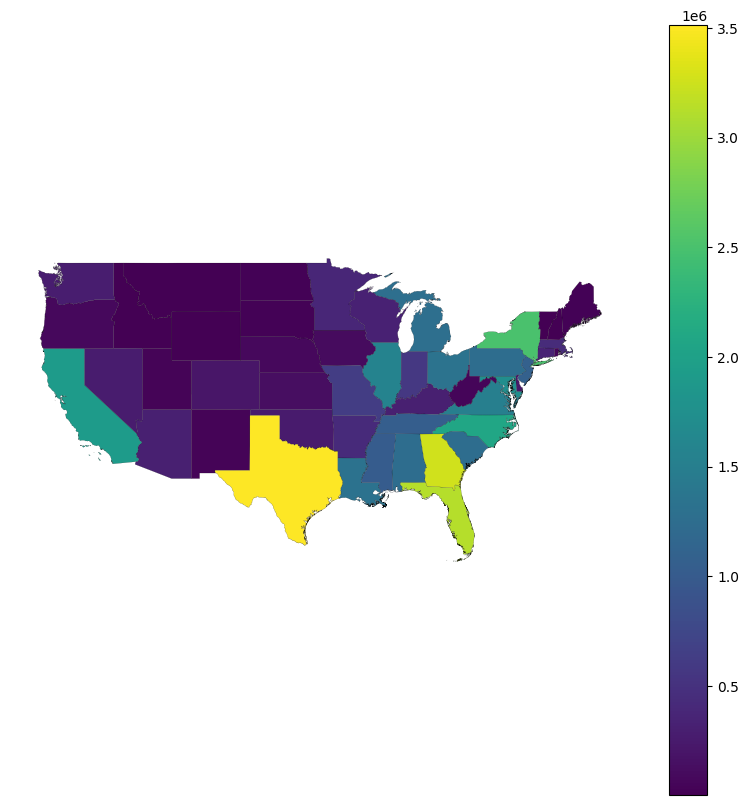

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_new.plot('Black', ax=ax, edgecolor='black', lw=.1, legend = True)
ax.set_axis_off() # Remove the axes

Take a moment to examine the map above. The lighter-colored states indicate areas with a higher number of people identifying as Black. For example, states like California and Texas stand out with relatively higher counts. However, it's important to consider that these states also have the largest overall populations, which naturally contributes to higher absolute numbers. Keep in mind that this map shows **counts**, not **proportions**—so larger states may appear prominent simply because more people live there overall.

# Normalization of Data

Raw or total values—like those shown in the map above—can be useful, but they often lead to misleading interpretations when used in choropleth maps. This is because larger areas tend to have higher totals simply due to their size, not necessarily because the variable of interest is more concentrated there.

For example, California may show a high total population of people identifying as Black—not necessarily because it has a higher proportion, but because it's a large state with a large overall population. In contrast, smaller states like Maryland may have lower totals even if the proportion is higher.

This makes it difficult to fairly compare values between areas of different sizes. To address this, we **normalize** the data—typically by converting raw totals into rates, percentages, or densities. Normalization allows us to make more meaningful comparisons by accounting for differences in population size or geographic area.

In this next map, we are going to normalize the population per square mile. In our first step, we need to check the coordinate reference system (CRS). Remember,
- **CRS matters!** Area must be calculated in a **projected coordinate system**, not in a speherical coordinate system (e.g., latitude/longitude such as EPSG:4326), or the result will be incorrect.
- **EPSG:5070**, which is am equal-area projection, is a good choice for CONUS-wide analysis. For Alaska, Hawaii , or territories, you may want to choose region-specific projections.    

## Checking the Coordinate Reference System of a Shapefile

Below we check the coordinate reference system of the shapefile

In [22]:
# Print the CRS
print(gdf_new.crs)

EPSG:4326


What is EPSG:4326? Do some internet research and find out. Is it a projected coordinate system? (answer: No)

### Reprojecting a Shapefile to Albers Equal Area for CONUS

In [23]:
# Reproject to Albers Equal Area for CONUS
gdf_proj = gdf_new.to_crs("EPSG:5070")  # or use "EPSG:5070"

# Calculate area in square kilometers
gdf_proj['area_km2'] = gdf_proj.geometry.area / 1e6

# print and see the new column
gdf_proj.head()


,STATENAM,geometry,Location,White,Black,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Pacific Islander,Multiple Races,Total,Footnotes,area_km2
0,Alabama,"MULTIPOLYGON (((763205.386 822986.479, 763007....",Alabama,3144100.0,1237600.0,284500.0,76800.0,12800.0,NaN,187400.0,4945200.0,NaN,133676.119625
1,Arizona,"POLYGON ((-1581748.321 1701444.813, -1382280.2...",Arizona,3794300.0,318500.0,2296000.0,256000.0,223700.0,13100.0,351400.0,7252900.0,NaN,295222.502170
2,Arkansas,"POLYGON ((559472.704 1457281.993, 561049.286 1...",Arkansas,2000100.0,418800.0,272900.0,49900.0,11300.0,11500.0,209100.0,2973600.0,NaN,137713.523604
3,California,"MULTIPOLYGON (((-1959193.572 1297764.835, -195...",California,12684400.0,1910700.0,15480200.0,5934000.0,97600.0,128600.0,1902600.0,38138100.0,NaN,409629.395685
4,Colorado,"POLYGON ((-671177.633 2027603.667, -504621.167...",Colorado,3702100.0,205600.0,1300000.0,185400.0,18000.0,8200.0,305200.0,5724600.0,NaN,269799.635872


## Normalize Black Population by Area

In this next step we will normalize the column `Black` by our new column `area_km2`. This will give of the number of Black people per square kilometer.

In [24]:
# divide the total Black population by the area
gdf_proj['Black_density'] = gdf_proj['Black'] / gdf_proj['area_km2']

# check for the new column of data
gdf_proj.head()

,STATENAM,geometry,Location,White,Black,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Pacific Islander,Multiple Races,Total,Footnotes,area_km2,Black_density
0,Alabama,"MULTIPOLYGON (((763205.386 822986.479, 763007....",Alabama,3144100.0,1237600.0,284500.0,76800.0,12800.0,NaN,187400.0,4945200.0,NaN,133676.119625,9.258198
1,Arizona,"POLYGON ((-1581748.321 1701444.813, -1382280.2...",Arizona,3794300.0,318500.0,2296000.0,256000.0,223700.0,13100.0,351400.0,7252900.0,NaN,295222.502170,1.078847
2,Arkansas,"POLYGON ((559472.704 1457281.993, 561049.286 1...",Arkansas,2000100.0,418800.0,272900.0,49900.0,11300.0,11500.0,209100.0,2973600.0,NaN,137713.523604,3.041096
3,California,"MULTIPOLYGON (((-1959193.572 1297764.835, -195...",California,12684400.0,1910700.0,15480200.0,5934000.0,97600.0,128600.0,1902600.0,38138100.0,NaN,409629.395685,4.664460
4,Colorado,"POLYGON ((-671177.633 2027603.667, -504621.167...",Colorado,3702100.0,205600.0,1300000.0,185400.0,18000.0,8200.0,305200.0,5724600.0,NaN,269799.635872,0.762047


Plot the Choropleth for US Black Population per Sq. km in 2023

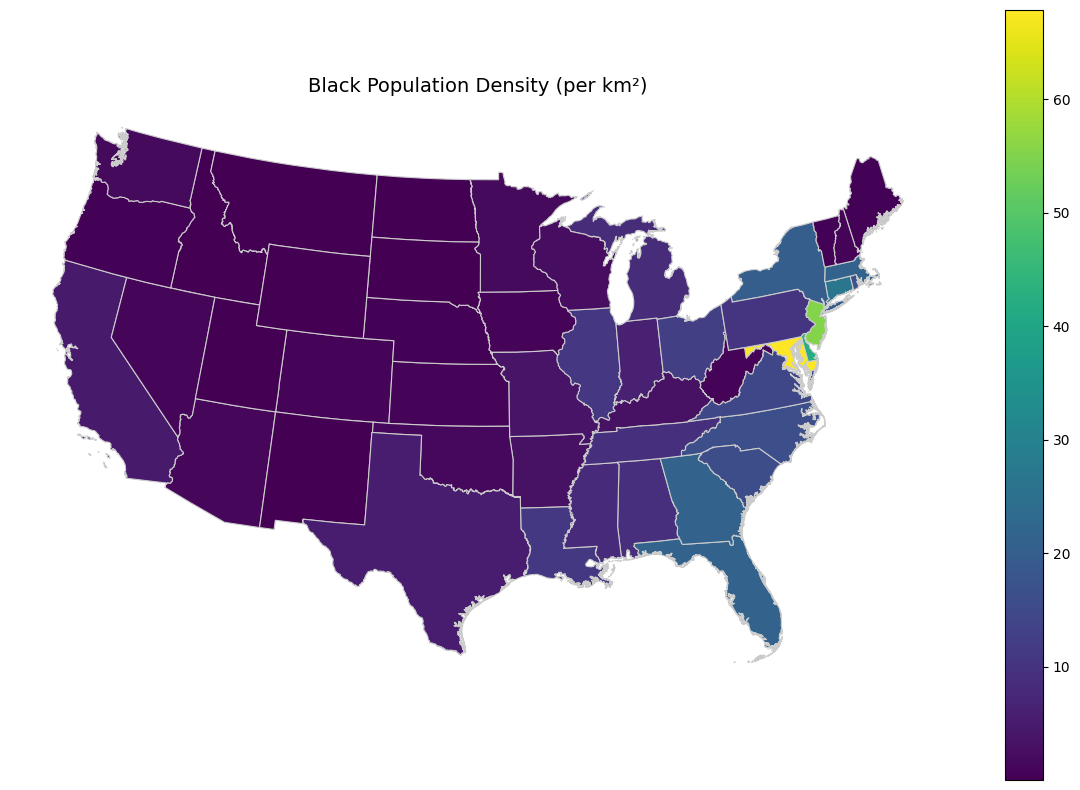

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_proj.plot(
    column='Black_density',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)
ax.set_title("Black Population Density (per km²)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

In the figure above, we now see the **density** of the Black population across states, measured as the number of individuals per square kilometer. This map reveals that states in the **Mid-Atlantic and Southeast**—despite their smaller land area—have much higher population densities than many larger states.

By expressing the data as **density rather than raw counts**, we’ve **normalized** the values. This means we’ve accounted for differences in state size, allowing for a fairer comparison across regions. Choropleth maps that use normalized values like density provide a more accurate picture of spatial distribution, especially when enumeration units (like states or counties) vary significantly in area.

## Understanding Rates and Proportions in Mapping

 When working with aggregated data, it's important to understand how **rates** and **proportions** help us make fair comparisons across different regions.
 - A **rate** expresses the relationship between two quantities, typically as a value per a larger base – for example, **population density** (people per square kilometer) or a **drug overdose death rate** ([26.9 deaths per 100,000 people in California](https://www.cdc.gov/nchs/pressroom/states/california/ca.htm)).
 - A **proportion** shows how a part relates to the whole, often represented as a percentage. For instance, accoding to the[2024 US Census](https://www.census.gov/quickfacts/fact/table/CA/SEX255223), **50.1% of California's population is female.**

 Both rates and proportions are forms of **data normalization.** They adjust for differences in population or area size, allowing for more meaningful comparisons in choropleth maps and other forms of spatial analysis.

## Normalize Black Population by Total Population

Now, let’s explore what happens when we normalize the Black population by the total population of each state. Instead of looking at raw counts or density, we calculate the **proportion of Black individuals within each state's population.** This gives us a percentage that reflects how large the Black population is **relative to the total population** in each state.

By mapping these proportions, we gain insight into **demographic representation**—how prevalent a group is within a given area—rather than just how many people live there.

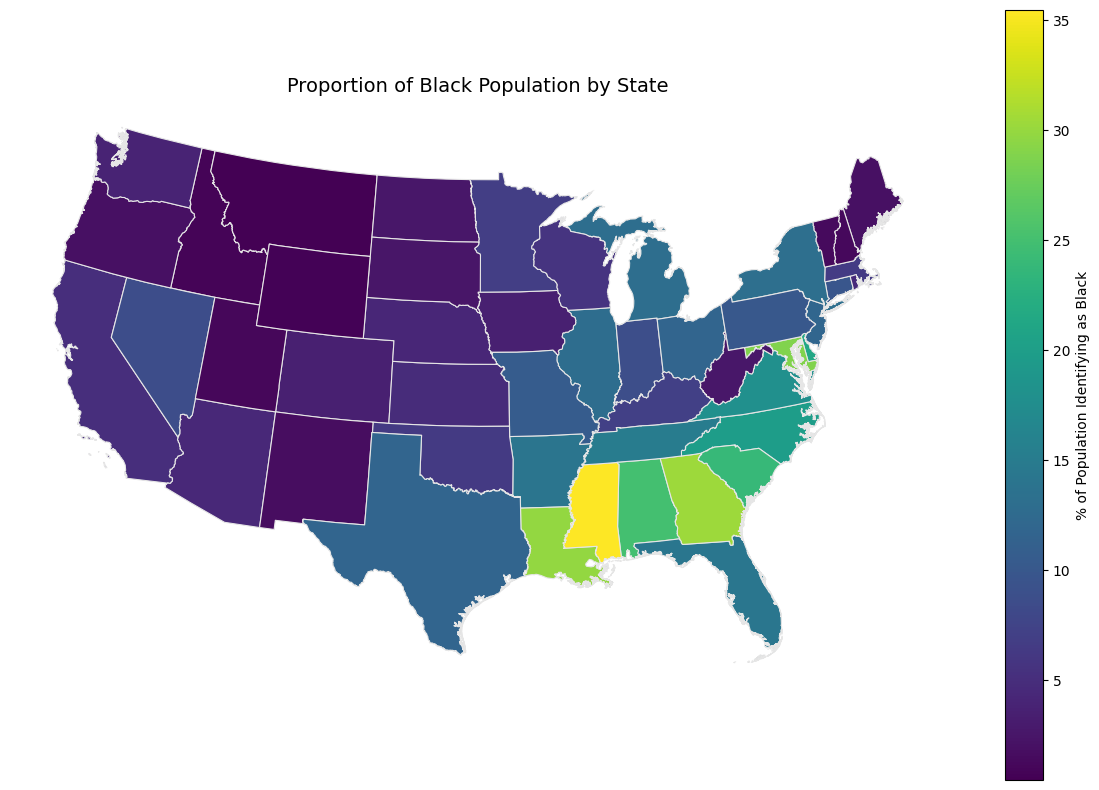

In [26]:
# Calculate the proportion of Black population and add it to the attribute table
gdf_proj['Black_pct'] = (gdf_proj['Black'] / gdf_proj['Total']) * 100

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(12, 8))
gdf_proj.plot(
    column='Black_pct',
    linewidth=0.8,
    edgecolor='0.9',
    legend=True,
    legend_kwds={'label': "% of Population Identifying as Black"},
    ax=ax
)
ax.set_title("Proportion of Black Population by State", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

By calculating and mapping proportions, we gain a deeper understanding of demographic representation across geographic regions. While raw counts and densities can show where populations are large or concentrated, proportions allow us to see where a group makes up a significant share of the total population—regardless of overall size or area. This type of normalization is essential when comparing areas with different population totals, ensuring that our interpretations are fair, meaningful, and grounded in context. As you continue exploring choropleth maps, remember that the way data is scaled—whether through totals, rates, or proportions—directly influences the story your map tells.

# Data Classification

When visualizing geographic data, especially through choropleth maps, we often need to group similar values together into categories. This process—called **data classification**—involves assigning attribute values to a limited number of meaningful groups, or classes. Classification simplifies continuous or complex datasets into interpretable patterns, making it easier to compare and communicate information through maps.

In the context of cartography and spatial analysis, classification is particularly important for **quantitative attributes** (such as population density or income), where values exist on ordinal, interval, or ratio scales and can be ordered. Grouping these values into classes helps reduce visual complexity while still preserving important trends and differences. This is not only useful for single-map interpretation, but also for **temporal or spatial comparison**, such as examining changes in Black population density across centuries or between regions.

Data classification also has implications beyond visual clarity. The choice of classification method directly shapes how the user perceives the underlying data. For example, classifying continuous population values into five categories can reveal regional trends that might be obscured in an unclassed map. Similarly, choosing one classification scheme over another—like quantiles versus natural breaks—can highlight or mask certain spatial patterns.

Ultimately, the goal of classification is to **enhance map readability while retaining analytical integrity.** As you’ll see in this section, selecting the number of classes and how data is grouped isn't arbitrary—it’s a crucial design decision that affects both the **accuracy** and **interpretability** of your map.


## Data Classification: Considerations for Mapping

One of the most important decisions when designing a choropleth map is determining how to classify your data. The goal of classification is not to alter the character of the data, but to **simplify it for visualization** while preserving meaningful spatial patterns.

An effective classification method should highlight the underlying trends in the data without overwhelming or misleading the map reader. To guide your classification choices, consider these key questions:

- **How many** classes should I use?

- **What classification method** is appropriate?

- **What kinds of error or distortion** might this introduce?



## Choosing the Number of Classes

The number of classes you select should be informed by the spatial distribution of the data and the audience's ability to interpret the map. Too many classes can overwhelm the viewer, while too few can oversimplify the story the data is telling.

- **Too many classes** (e.g., 9 or more) can clutter the map, make colors harder to distinguish, and demand greater cognitive effort from the reader.

- **Too few classes** (e.g., 2 or 3) can obscure important variation and may group very different values into the same category.

*Note: Data quality or uncertainty should not influence your choice of class number—classification is about visualization, not about error correction.*

Below is a code example that demonstrates the visual impact of choosing different numbers of classes on a choropleth map.

First we have to install the library `mapclassify`

In [30]:
# Uncomment to run
# !pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 4.3 MB/s eta 0:00:00


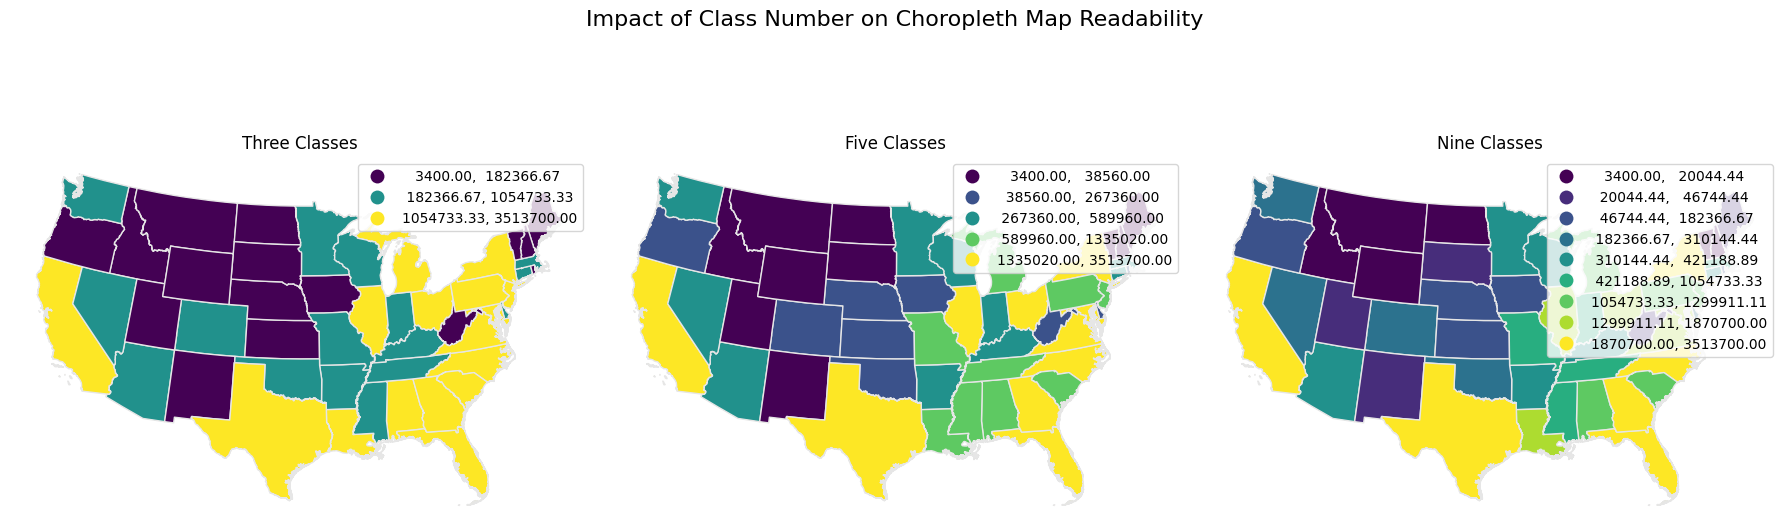

In [33]:
import mapclassify

# Plot maps with different numbers of classes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 3 Classes
gdf_proj.plot(
    column='Black',
    scheme='Quantiles',
    k=3,
    legend=True,
    ax=axs[0],
    legend_kwds={},
    edgecolor='0.9'
)
axs[0].set_title("Three Classes")
axs[0].axis('off')

# 5 Classes
gdf_proj.plot(
    column='Black',
    scheme='Quantiles',
    k=5,
    legend=True,
    ax=axs[1],
    legend_kwds={},
    edgecolor='0.9'
)
axs[1].set_title("Five Classes")
axs[1].axis('off')

# 9 Classes
gdf_proj.plot(
    column='Black',
    scheme='Quantiles',
    k=9,
    legend=True,
    ax=axs[2],
    legend_kwds={},
    edgecolor='0.9'
)
axs[2].set_title("Nine Classes")
axs[2].axis('off')

plt.tight_layout()
plt.suptitle("Impact of Class Number on Choropleth Map Readability", fontsize=16, y=1.05)
plt.show()

## Common Data Classification Methods

Once you decide to classify your data, the next important step is choosing a **classification method.** Each method follows a different logic for dividing the data into classes, and the method you choose can significantly influence how patterns are perceived on the map. Below are some of the most commonly used approaches:

1. **Equal Interval**
This method divides the range of values into **equal-sized intervals.** Each class spans the same numerical distance, regardless of how the data are distributed.

  - Best for: Uniformly distributed data

  - Drawback: Can obscure meaningful variation in skewed data

2. **Quantiles**
Quantiles divide the dataset so that each class contains an **equal number of features** (e.g., states or counties).

  - Best for: Highlighting relative ranking or comparison

   - Drawback: Class breaks may fall between very different values

3. **Natural Breaks (Jenks)**
This method identifies natural groupings and gaps in the data using statistical optimization. It minimizes variance within classes and maximizes variance between them.

   - Best for: Skewed or clustered data

  - Drawback: Classes may be unevenly populated

4. **Standard Deviation**
Class breaks are based on how far values deviate from the mean. This is useful when comparing values to an average or identifying outliers.

  - Best for: Normally distributed data or emphasizing deviation

  - Drawback: Not intuitive for general audiences

5. **Manual Classification**
You choose the class breaks yourself based on domain knowledge or meaningful thresholds.

- Best for: Custom comparisons or policy-relevant thresholds

- Drawback: Can introduce subjectivity or bias

Each method reveals different patterns in the same dataset. It's important to experiment and think critically about which classification best supports your map’s purpose. In the next section, you'll learn how to apply these classification methods in Python using the `mapclassify` library with `GeoPandas`.



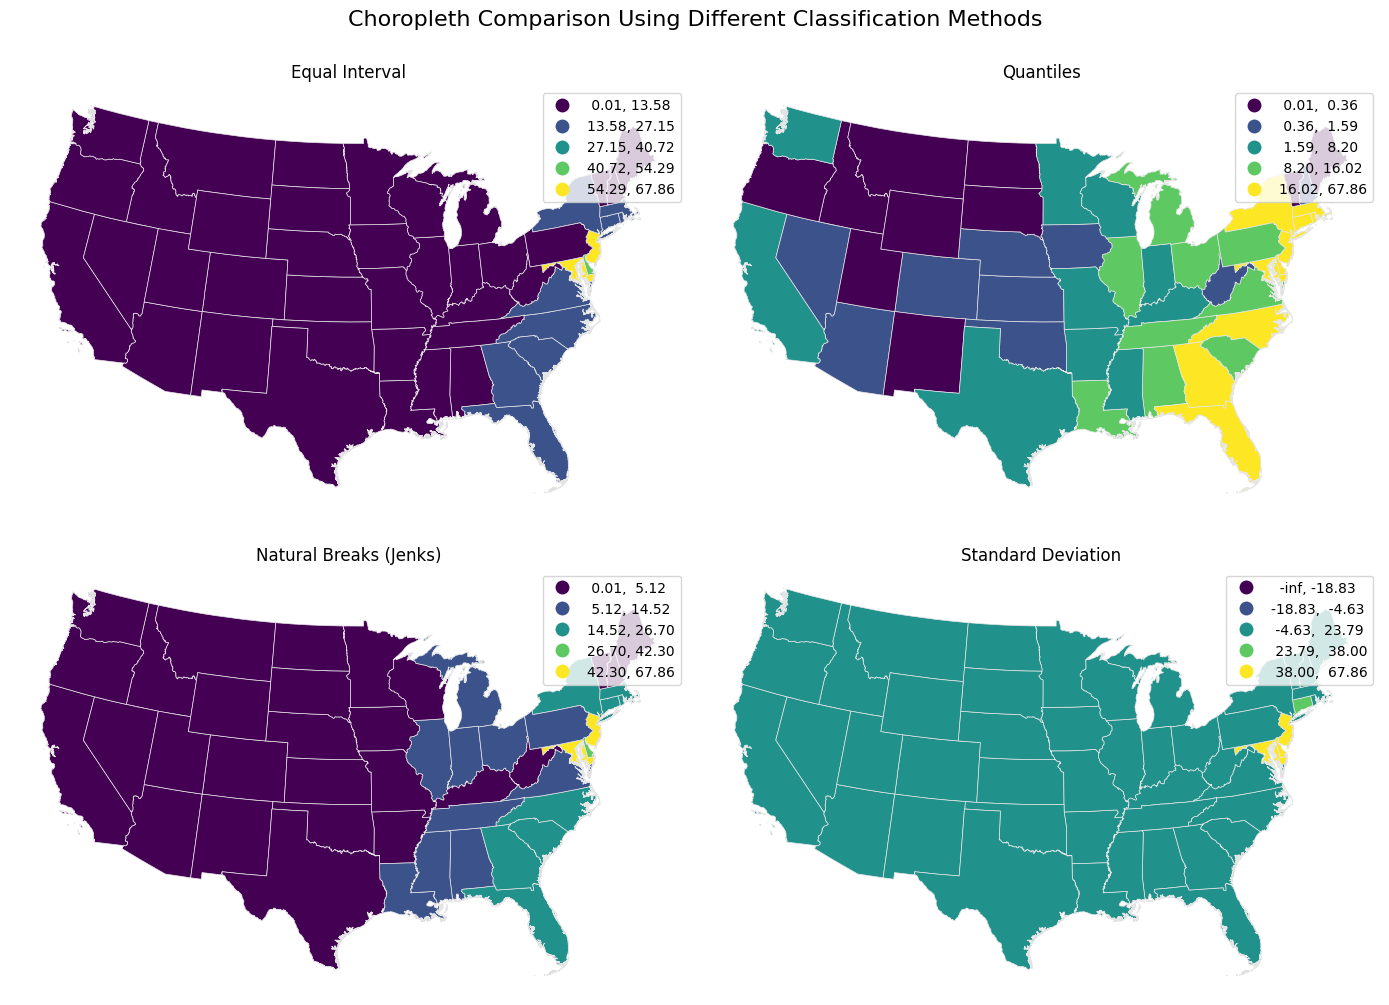

In [39]:
# Define classification methods to test
schemes = {
    "Equal Interval": mapclassify.EqualInterval,
    "Quantiles": mapclassify.Quantiles,
    "Natural Breaks (Jenks)": mapclassify.NaturalBreaks,
    "Standard Deviation": mapclassify.StdMean
}

# Set up plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Plot each classification method
for i, (name, classifier) in enumerate(schemes.items()):
    # Use the correct string names for the schemes
    scheme_name = ""
    if name == "Equal Interval":
        scheme_name = "equalinterval"
    elif name == "Quantiles":
        scheme_name = "quantiles"
    elif name == "Natural Breaks (Jenks)":
        scheme_name = "naturalbreaks"
    elif name == "Standard Deviation":
        scheme_name = "stdmean"

    gdf_proj.plot(
        column='Black',
        scheme=scheme_name,
        classification_kwds={'k': 5} if name != "Standard Deviation" else {},
        legend=True,
        edgecolor='0.9',
        linewidth=0.5,
        ax=axs[i],
        legend_kwds={'label': "Total Black Population"}
    )
    axs[i].set_title(name)
    axs[i].axis('off')

plt.tight_layout()
plt.suptitle("Choropleth Comparison Using Different Classification Methods", fontsize=16, y=1.03)
plt.show()

# Now lead in here with the Dubois Maps and classifcation categories and mapping exercise.